# Last.fm User Exploratory Data Analysis

note: explore bivariate analysis between artist's play count and their location but that requires combining location data, maybe look into outliers?, include more interpretations and comment more later to make it more professional

## Setup and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# read in user data
file_path = r'filtered_user_df.csv'
user_df = pd.read_csv(file_path)

In [3]:
# drop unnecessary columns
user_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [4]:
# display data
user_df.head()

,user,artist_name,play_count,artist_url
0,nyancrimew,Jasmine Thompson,7559,https://www.last.fm/music/Jasmine+Thompson
1,nyancrimew,Eminem,5851,https://www.last.fm/music/Eminem
2,nyancrimew,Watsky,3044,https://www.last.fm/music/Watsky
3,nyancrimew,Linkin Park,2938,https://www.last.fm/music/Linkin+Park
4,nyancrimew,twenty one pilots,1849,https://www.last.fm/music/twenty+one+pilots


In [5]:
# basic understanding of dataset
print(f'DataFrame Shape:\n{user_df.shape}\n')

print(f'DataFrame Column Types:\n{user_df.dtypes}\n')

print(f'Number of Missing Values:\n{user_df.isna().sum()}')

DataFrame Shape:
(7682455, 4)

DataFrame Column Types:
user           object
artist_name    object
play_count      int64
artist_url     object
dtype: object

Number of Missing Values:
user           0
artist_name    0
play_count     0
artist_url     0
dtype: int64


## Numerical Analysis

### Play Count

In [6]:
# get summary statistics of play count
user_df['play_count'].describe()

count    7.682455e+06
mean     5.763435e+02
std      2.436419e+03
min      1.000000e+00
25%      6.800000e+01
50%      2.290000e+02
75%      5.880000e+02
max      2.352717e+06
Name: play_count, dtype: float64

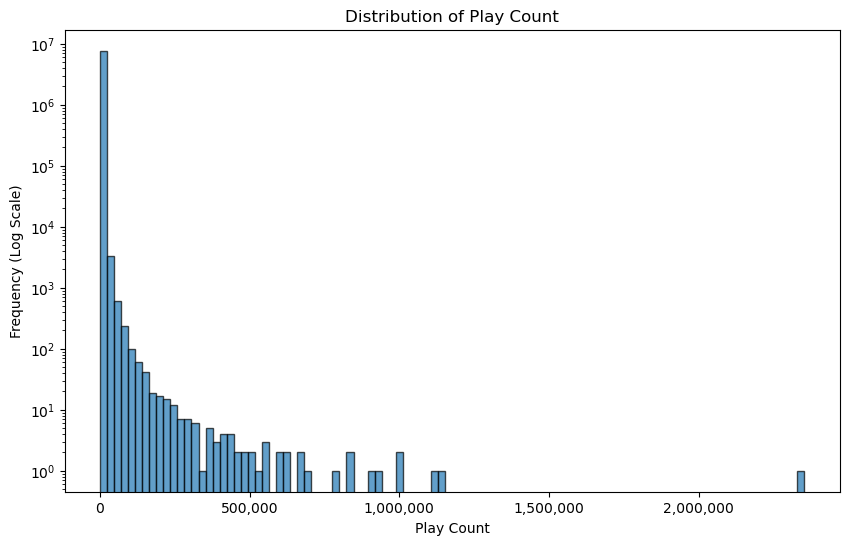

In [7]:
# plot distribution of play count
plt.figure(figsize=(10, 6))
plt.hist(user_df['play_count'], bins=100, edgecolor='k', alpha=0.7)

plt.yscale('log', nonpositive='clip') 

plt.title('Distribution of Play Count')
plt.xlabel('Play Count')
plt.ylabel('Frequency (Log Scale)')

# setting the x-axis to display whole numbers using a custom formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# Categorical Analysis

### User

In [8]:
# get number of unique 
print(f'Number of Unique Users:\n{user_df["user"].nunique()}')

Number of Unique Users:
193707


In [9]:
# dataframe of users by total play count to analyze usage
user_totalplay = user_df.groupby('user')['play_count'].sum().reset_index(name='total_play_count')

In [10]:
# top 10 users
user_totalplay.nlargest(10, 'total_play_count')

,user,total_play_count
170305,shodate76,3714448
72935,Zandhr,2125259
116877,higorrz,2109043
850,AGGAV,1741957
91611,chemkelly,1627015
94853,crs16520,1618729
146505,monarcaladeus,1529169
90823,celestuls,1333451
158650,pixzen,1217551
45620,Morris_Albert_,1198810


In [11]:
# bottom 10 users
user_totalplay.nsmallest(10, 'total_play_count')

,user,total_play_count
236,09-D,1
294,12k,1
647,70x,1
653,77klash,1
1461,AdamKritz7861,1
1473,AdamTudor,1
1538,AdenLie,1
2755,AlienHeroine,1
2933,AllieFWxMD,1
3372,AmrEgy,1


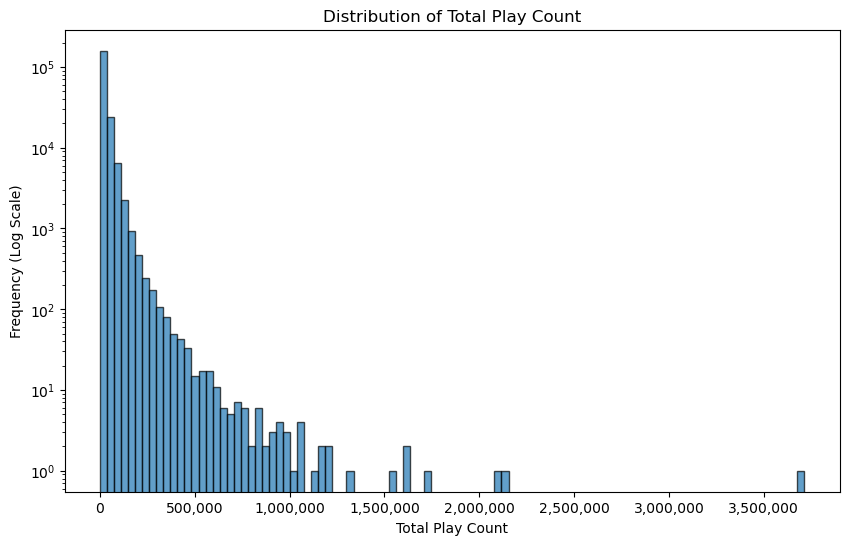

In [12]:
# graph distribution of total play count across users
plt.figure(figsize=(10, 6))
plt.hist(user_totalplay['total_play_count'], bins=100, edgecolor='k', alpha=0.7)

plt.yscale('log', nonpositive='clip') 

plt.title('Distribution of Total Play Count')
plt.xlabel('Total Play Count')
plt.ylabel('Frequency (Log Scale)')

# setting the x-axis to display whole numbers using a custom formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### Artist

In [13]:
# get number of unique artists
print(f'Number of Unique Artists:\n{user_df["artist_name"].nunique()}')

Number of Unique Artists:
97310


In [14]:
# dataframe of artists by total play count to analyze popularity
artist_totalplay = user_df.groupby('artist_name')['play_count'].sum().reset_index(name='total_play_count')

In [15]:
# top 10 artists
artist_totalplay.nlargest(10, 'total_play_count')

,artist_name,total_play_count
64569,Radiohead,41983697
76600,Taylor Swift,34268632
45673,Lady Gaga,32091963
5846,Arctic Monkeys,26447442
45808,Lana Del Rey,25931664
12187,Britney Spears,24100274
55766,Muse,22845764
16649,Coldplay,21327175
53064,Metallica,20587889
47485,Linkin Park,18686664


In [16]:
# bottom 10 artists
artist_totalplay.nlargest(10, 'total_play_count')

,artist_name,total_play_count
64569,Radiohead,41983697
76600,Taylor Swift,34268632
45673,Lady Gaga,32091963
5846,Arctic Monkeys,26447442
45808,Lana Del Rey,25931664
12187,Britney Spears,24100274
55766,Muse,22845764
16649,Coldplay,21327175
53064,Metallica,20587889
47485,Linkin Park,18686664


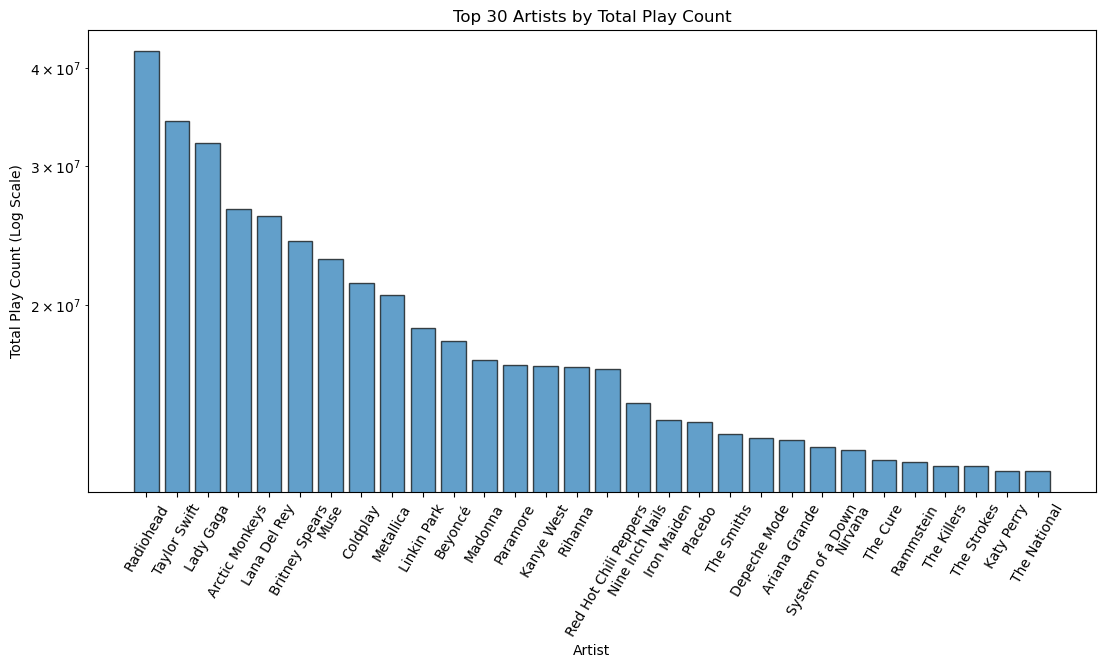

In [17]:
# graph top 30 artists and their total play count
# idk how useful this is so it could be tweaked
top_artists = artist_totalplay.nlargest(30, 'total_play_count')

plt.figure(figsize=(13, 6))
plt.bar(range(len(top_artists['artist_name'])), top_artists['total_play_count'], align='center', edgecolor='k', alpha=0.7)

plt.yscale('log', nonpositive='clip') 

plt.title('Top 30 Artists by Total Play Count')
plt.xlabel('Artist')
plt.ylabel('Total Play Count (Log Scale)')

plt.xticks(range(len(top_artists['artist_name'])), top_artists['artist_name'], rotation=60)

plt.show()

## Bivariate Analysis - Shivani

### First combining data with location data

In [27]:
import pandas as pd

# Load user data
file_path = 'filtered_user_df.csv'  
user_df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
for column in columns_to_drop:
    if column in user_df.columns:
        user_df.drop(columns=column, inplace=True)

# Load the artist location data

location_file_path = 'artist_location_codes.json'  
artist_location_df = pd.read_json(location_file_path, lines=True) 

# Transpose the DataFrame and reset the index to make 'artist_name' and 'location_code' columns
artist_location_df_transposed = artist_location_df.transpose().reset_index()
artist_location_df_transposed.columns = ['artist_name', 'location_code']

# Merge the user DataFrame with the transposed artist location DataFrame
merged_df = pd.merge(user_df, artist_location_df_transposed, on='artist_name', how='left')

# Check for any missing location codes
print(f'Number of Missing Location Codes: {merged_df["location_code"].isna().sum()}')

# Placing it into a visually appealing format
from IPython.display import display

display(merged_df.head())

Number of Missing Location Codes: 0


,user,artist_name,play_count,artist_url,location_code
0,nyancrimew,Jasmine Thompson,7559,https://www.last.fm/music/Jasmine+Thompson,GB
1,nyancrimew,Eminem,5851,https://www.last.fm/music/Eminem,US
2,nyancrimew,Watsky,3044,https://www.last.fm/music/Watsky,US
3,nyancrimew,Linkin Park,2938,https://www.last.fm/music/Linkin+Park,US
4,nyancrimew,twenty one pilots,1849,https://www.last.fm/music/twenty+one+pilots,US


### Seeing top 10 locations by play count

In [28]:
# Group by location_code and sum play_count to find total play counts per location
location_play_count = merged_df.groupby('location_code')['play_count'].sum().reset_index()

# Sort the results in descending order and take the top 10
top_locations_by_play_count = location_play_count.sort_values(by='play_count', ascending=False).head(10)

# Display the top 10 locations by play count
print(top_locations_by_play_count)

    location_code  play_count
177            US  2097234118
61             GB   764152993
31             CA   198632983
94             JP   161055168
45             DE   155498161
154            SE   139461750
59             FR    99885345
12             AU    86731600
26             BR    76130075
57             FI    67314367


### Seeing top 10 locations by number of time that location shows up

In [29]:
# Group by location_code and count the number of rows for each location to find its frequency
location_frequency = merged_df.groupby('location_code').size().reset_index(name='count')

# Sort the results in descending order and take the top 10
top_locations_by_frequency = location_frequency.sort_values(by='count', ascending=False).head(10)

# Display the top 10 locations by frequency of appearance
print(top_locations_by_frequency)

    location_code    count
177            US  3532062
61             GB  1420652
31             CA   333914
45             DE   301370
154            SE   227752
59             FR   201540
94             JP   190284
26             BR   151413
12             AU   150795
57             FI   103868


### Seeing Top Artists by Play Count in Top Locations

Allows us to identify which artists are most popular in locations with the highest overall play counts.

C:\Users\shivs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27996 (\N{CJK UNIFIED IDEOGRAPH-6D5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shivs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23822 (\N{CJK UNIFIED IDEOGRAPH-5D0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shivs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shivs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12422 (\N{HIRAGANA LETTER YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shivs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


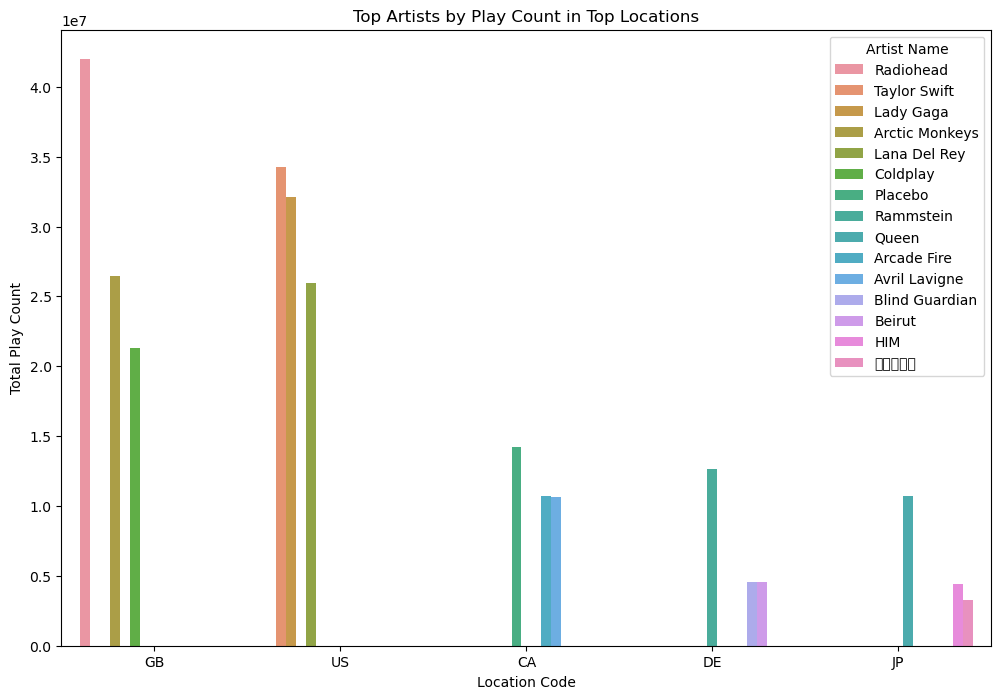

In [30]:
# First, identify top locations by total play count
top_locations = merged_df.groupby('location_code')['play_count'].sum().nlargest(5).index

# Filter the DataFrame for these locations
top_locations_df = merged_df[merged_df['location_code'].isin(top_locations)]

# Now, find the top artists in these locations by total play count
top_artists_by_location = top_locations_df.groupby(['location_code', 'artist_name'])['play_count'].sum().reset_index()
top_artists_by_location = top_artists_by_location.sort_values('play_count', ascending=False).groupby('location_code').head(3)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_artists_by_location, x='location_code', y='play_count', hue='artist_name')
plt.title('Top Artists by Play Count in Top Locations')
plt.xlabel('Location Code')
plt.ylabel('Total Play Count')
plt.legend(title='Artist Name')
plt.show()


### Seeing Top Artsts in Top Locations (by frequency)

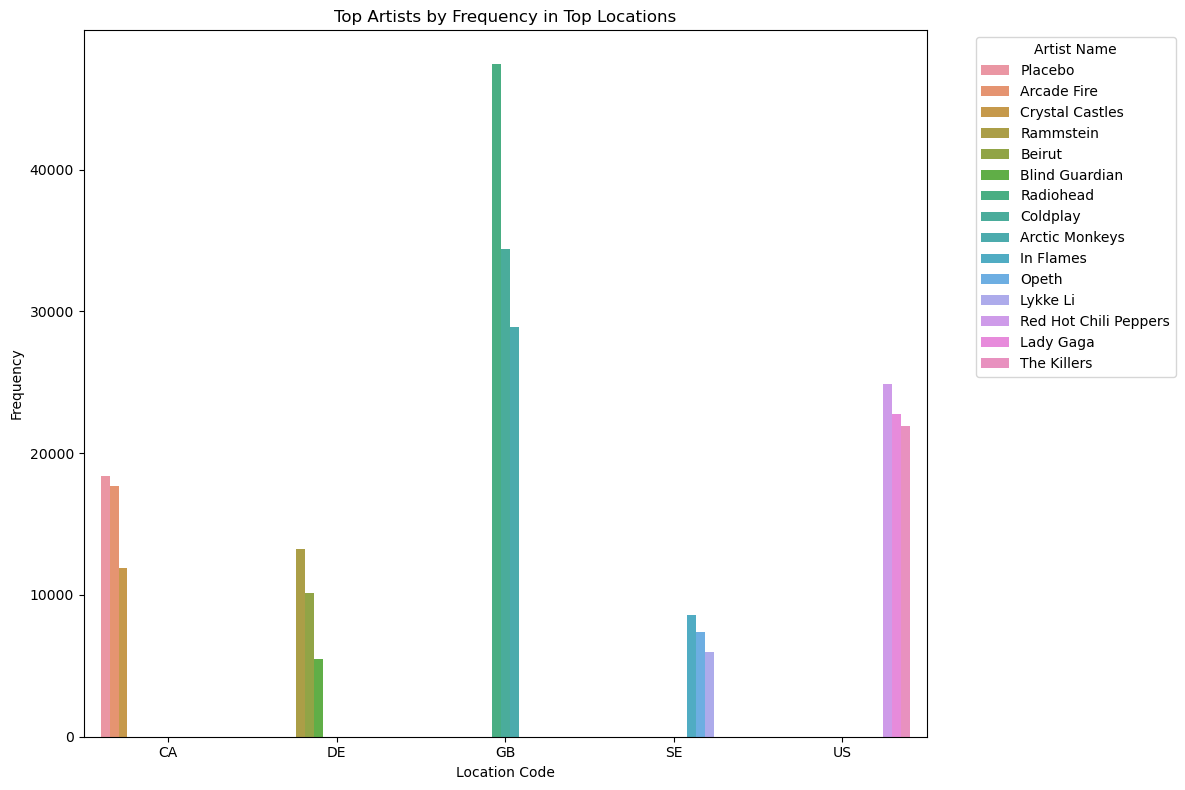

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Identify top locations by frequency
top_locations_by_freq = merged_df['location_code'].value_counts().nlargest(5).index

# Step 2: Filter the DataFrame for these top locations
top_locations_df_freq = merged_df[merged_df['location_code'].isin(top_locations_by_freq)]

# Step 3: For each top location, find the most popular artists based on frequency
# Count how often each artist appears in the filtered dataset
artist_freq_by_location = top_locations_df_freq.groupby(['location_code', 'artist_name']).size().reset_index(name='frequency')

# Sort within each location by frequency and then get the top 3 artists for each location
top_artists_by_freq_location = artist_freq_by_location.sort_values(['location_code', 'frequency'], ascending=[True, False])\
                                                       .groupby('location_code').head(3)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_artists_by_freq_location, x='location_code', y='frequency', hue='artist_name')
plt.title('Top Artists by Frequency in Top Locations')
plt.xlabel('Location Code')
plt.ylabel('Frequency')
plt.legend(title='Artist Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()


### Seeing top 10 users (by who has the most play counts) and the top 3 countries they litsen to (by play count)

In [37]:
# Step 1: Identify the top 10 users by total play count
top_10_users = merged_df.groupby('user')['play_count'].sum().nlargest(10).reset_index()

# Merge this info back to the original DataFrame to filter only for these users
top_10_users_df = pd.merge(merged_df, top_10_users[['user']], on='user')

# Step 2: For each of these users, calculate the total play count by country
user_country_play_count = top_10_users_df.groupby(['user', 'location_code'])['play_count'].sum().reset_index()

# Step 3: Identify the top 3 countries for each of these users
top_3_countries_by_user = user_country_play_count.groupby('user').apply(lambda x: x.nlargest(3, 'play_count')).reset_index(drop=True)

# Display the result
print(top_3_countries_by_user)


              user location_code  play_count
0            AGGAV            US      628638
1            AGGAV            GB      442725
2            AGGAV            SE      245734
3   Morris_Albert_            AU     1155897
4   Morris_Albert_            GB       16354
5   Morris_Albert_            BR        7174
6           Zandhr            US     1466814
7           Zandhr            CA      349125
8           Zandhr            AU      141069
9        celestuls            KR     1029164
10       celestuls            NL      101123
11       celestuls            US       81070
12       chemkelly            US      897747
13       chemkelly            GB      322245
14       chemkelly            CA      184967
15        crs16520            GB      792382
16        crs16520            US      600101
17        crs16520            DK      124333
18         higorrz            US      899970
19         higorrz            SE      291476
20         higorrz            MX      270814
21   monar